In [29]:
import matplotlib.pyplot as plt, numpy as np
from deap.tools import Logbook
from typing import Callable, TypeVar
import pickle, os
from main import create_parser
from run_gp import RunInfo
from shared_tools.toolbox import create_toolbox
from simple_pred.function_set import create_pset
from shared_tools.make_datasets import x_train, y_train, x_test, y_test

In [30]:
def setup_enviroment():
    datasets = {
        "train": (x_train, y_train),
        "test": (x_test, y_test)
    }
    parameters = create_parser().parse_args([])
    pset = create_pset(*x_train[0].shape)
    toolbox = create_toolbox(datasets, pset, parameters)
setup_enviroment()

Exception: Ephemerals with different functions should be named differently, even between psets.

In [31]:
def plot(logbook: Logbook) -> None:
    gen = logbook.select("gen")

    size_avgs = logbook.chapters["size"].select("avg")

    fig, axs = plt.subplots(2, 2)
    combinations = zip(["min", "max", "avg"], ["red", "green", "blue"])

    for ax, (setting, color) in zip(axs.flat, combinations):
        ax.plot(gen, logbook.chapters["fitness"].select(setting),
                color=color, label=f"fitness_{setting}")
        ax.set_title(f"Fitness {setting}")
        ax.set(xlabel='x-label', ylabel='y-label')
    axs[1,1].plot(gen, size_avgs, color="orange")
    axs[1,1].set_title("Average Size")
    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.set(xlabel="generations", ylabel="fitness")
        # ax.label_outer()
    axs[1,1].set(ylabel="size")
    plt.show()


In [32]:
from typing import Iterable
T = TypeVar('T')

def plot_across_all_runs(extractor: Callable[[RunInfo], T], title: str, model: str="simple_pred", type="line") -> None:
    info = get_data(extractor, model)
    if type == "box":
        plt.boxplot(info)
    else:
        for result in info:
                 plt.plot(result)
    plt.title(title)
    plt.show()

def get_data(extractor: Callable[[RunInfo], T], model: str="simple_pred") -> list[T]:
    return retrieve_from_files(extractor, (f"{model}/data/{name}" for name in os.listdir(f"{model}/data")))

def retrieve_from_files(extractor: Callable[[RunInfo], T], files: Iterable[str]) -> list[T]:
    result = []
    for file_path in files:
        with open(file_path, 'rb') as file:
            result.append(extractor(pickle.load(file)))
    return result




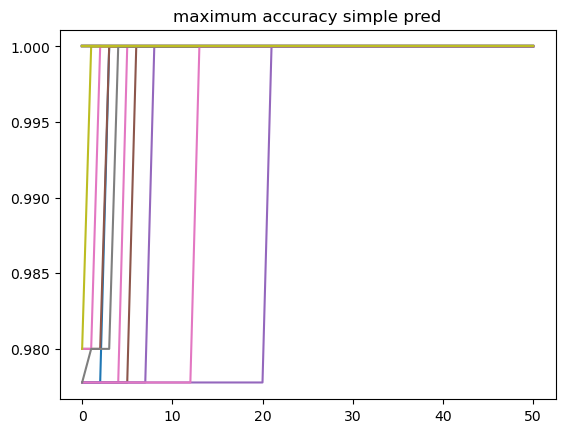

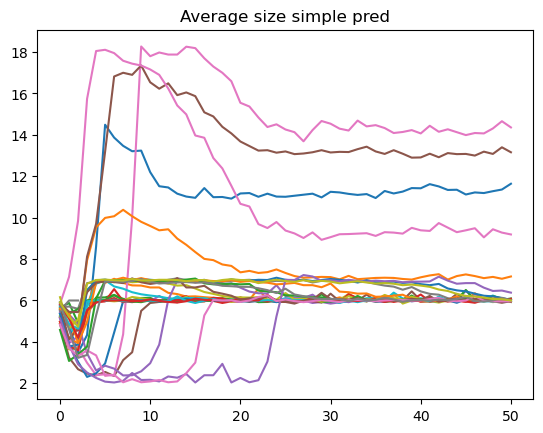

In [33]:
plot_across_all_runs(lambda i: i.log.chapters["fitness"].select('max'), title="maximum accuracy simple pred")
plot_across_all_runs(lambda i: i.log.chapters["size"].select('avg'), title="Average size simple pred")


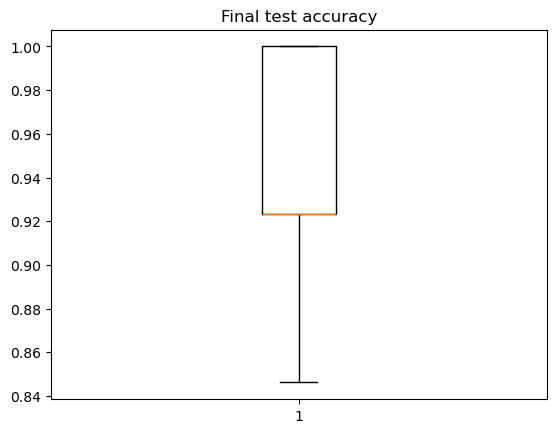

0.944 ± 0.045  (mean) ± (std)


In [37]:
plot_across_all_runs(lambda i: i.test_accuracy, title="Final test accuracy", type="box")
test_results = np.array(get_data(lambda i: i.test_accuracy))
print(f"{round(test_results.mean(), 3)} ± {round(test_results.std(), 3)}  (mean) ± (std)")